In [1]:
import autorootcwd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from src.irls import IRLS
from src.data import artificial

100%|██████████| 6/6 [00:25<00:00,  4.17s/it]


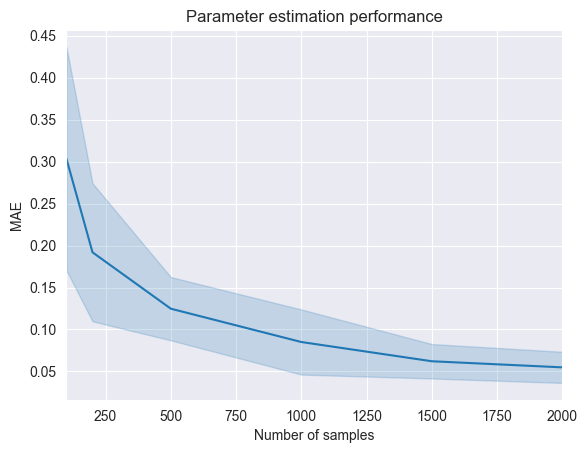

In [3]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_samples_list = [100, 200, 500, 1000, 1500, 2000]
num_features = 3
interaction_pairs = [(1, 2)]

mae_values = []
sample_sizes = []
seed_values = []

for num_samples in tqdm(num_samples_list):
    for seed in seeds:
        np.random.seed(seed)

        X, y, true_weights = artificial.generate_data(
            num_samples=num_samples,
            num_features=num_features,
            interaction_pairs=interaction_pairs,
        )
        irls = IRLS(interaction_pairs=interaction_pairs)
        weights = irls.fit(X, y)

        mae = np.mean(np.abs(weights - true_weights))
        mae_values.append(mae)
        sample_sizes.append(num_samples)
        seed_values.append(seed)

df = pd.DataFrame({"MAE": mae_values, "Number of samples": sample_sizes, "Seed": seed_values})

# set seaborn style
sns.set_style("darkgrid")

# set x limit
plt.xlim(num_samples_list[0], num_samples_list[-1])

sns.lineplot(x="Number of samples", y="MAE", data=df, ci="sd")
plt.title("Parameter estimation performance")
plt.show()


100%|██████████| 6/6 [00:27<00:00,  4.65s/it]


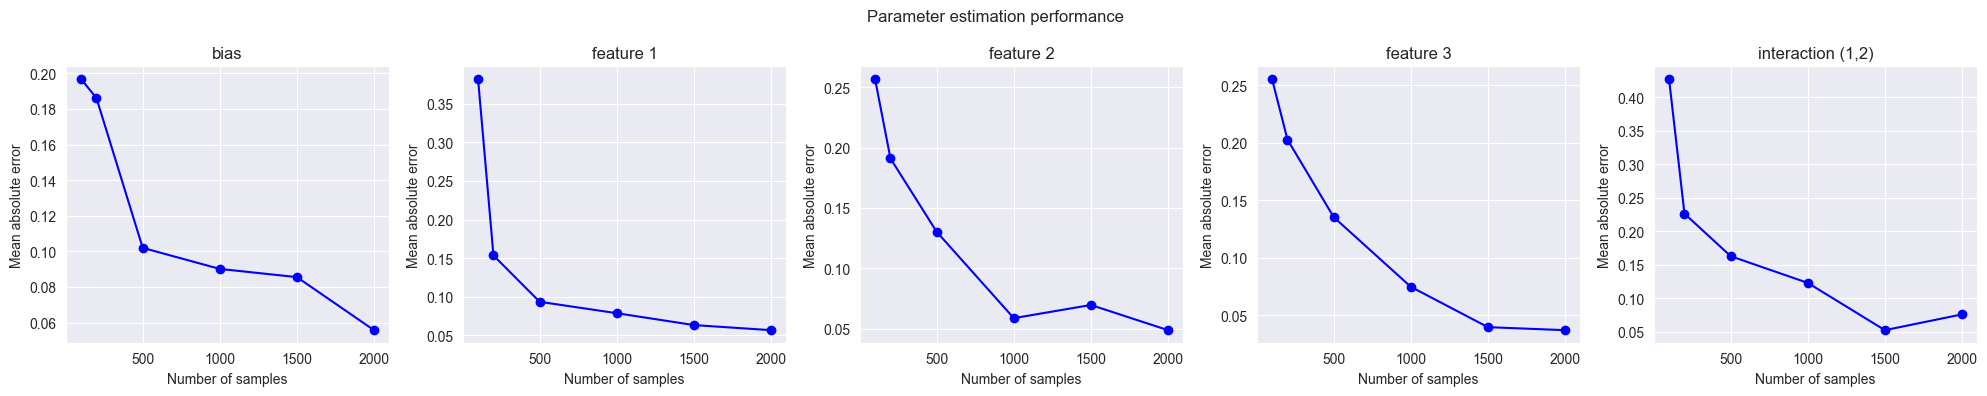

In [4]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_samples_list = [100, 200, 500, 1000, 1500, 2000]
num_features = 3
interaction_pairs = [(1, 2)]

mae_dict = {}  # dictionary to store MAE values
param_names = ["bias", "feature 1", "feature 2", "feature 3", "interaction (1,2)"]  # parameter names

for num_samples in tqdm(num_samples_list):
    mae_values = []
    for seed in seeds:
        np.random.seed(seed)

        X, y, true_weights = artificial.generate_data(
            num_samples=num_samples,
            num_features=num_features,
            interaction_pairs=interaction_pairs,
        )
        
        irls = IRLS(interaction_pairs=interaction_pairs)
        weights = irls.fit(X, y)

        mae_values.append(np.abs(weights - true_weights))

    mae_dict[num_samples] = np.mean(mae_values, axis=0)

# plot results
fig, axs = plt.subplots(1, len(weights), figsize=(20, 4))
for i, param_name in enumerate(param_names):
    axs[i].plot(num_samples_list, [mae_dict[num_samples][i] for num_samples in num_samples_list], "bo-")
    axs[i].set_xlabel("Number of samples")
    axs[i].set_ylabel("Mean absolute error")
    axs[i].set_title(param_name)

plt.suptitle("Parameter estimation performance")
plt.tight_layout()
plt.show()

100%|██████████| 16/16 [00:28<00:00,  1.81s/it]


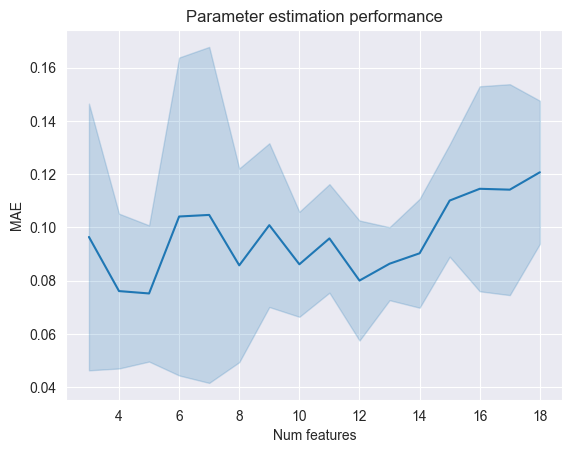

In [5]:
seeds = [0, 1, 2, 3, 4]
num_samples = 1000
num_features_list = [i for i in range(3, 43)]
interaction_pairs = [(1, 2)]

mae_values = []
num_features_values = []
seed_values = []

for num_features in tqdm(num_features_list):
    for seed in seeds:
        np.random.seed(seed)

        X, y, true_weights = artificial.generate_data(
            num_samples=num_samples,
            num_features=num_features,
            interaction_pairs=interaction_pairs,
        )
        
        irls = IRLS(interaction_pairs=interaction_pairs)
        weights = irls.fit(X, y)

        mae = np.mean(np.abs(weights - true_weights))
        mae_values.append(mae)
        num_features_values.append(num_features)
        seed_values.append(seed)

df = pd.DataFrame({"MAE": mae_values, "Num features": num_features_values, "Seed": seed_values})

# set seaborn style
sns.set_style("darkgrid")

sns.lineplot(x="Num features", y="MAE", data=df, ci="sd")
plt.title("Parameter estimation performance")
plt.show()
